In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [2]:
gold_data=pd.read_csv('gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [5]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
correlation = gold_data.corr()

<AxesSubplot:>

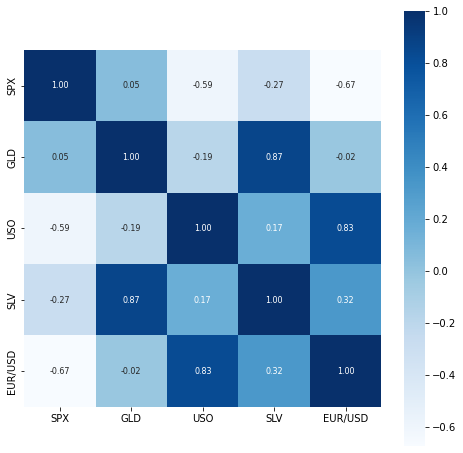

In [11]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar = True, square = True, fmt='.2f' , annot=True, annot_kws= {'size': 8}, cmap = 'Blues')

In [12]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\mayur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

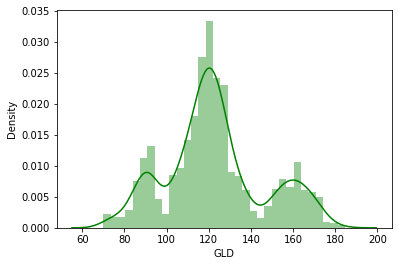

In [14]:
#checking the distribution for GLD price
sns.distplot(gold_data['GLD'], color= 'green')

In [16]:
x = gold_data.drop(['Date','GLD'], axis=1)
y = gold_data['GLD']

In [17]:
x_train,x_test, y_train, y_test = train_test_split(x, y , test_size= 0.2, random_state= 2)


In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
# training the model
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [20]:
# prediction on test data
test_data_prediction = regressor.predict(x_test)


In [21]:
print(test_data_prediction)

[168.81970002  82.21229993 116.13890038 127.53850048 120.60830121
 154.62769666 150.52469829 126.20429992 117.4184988  125.96620091
 116.70630107 171.1985005  141.40319801 167.54669872 114.96270019
 117.60790086 139.72830352 170.16220144 159.23490292 157.49969911
 154.8286997  125.09190017 176.34890009 156.985103   125.19990036
  93.89209972  76.95840042 120.65279991 119.02659924 167.51380003
  88.13430095 125.21990001  91.17980065 117.72740007 121.06639929
 136.83230076 115.45420111 115.31530076 148.6736     106.98350095
 104.54500248  87.29299806 126.48290059 118.02550008 153.66109896
 119.60189999 108.24890056 108.2797981   93.38480072 127.0106982
  75.81189977 113.63359944 121.22580032 111.35359917 118.94649895
 120.61599961 159.08960089 167.13650038 147.00419644  85.98009901
  94.36330033  86.72989904  90.50739991 119.06850073 126.45180041
 127.43239987 169.52500022 122.35159937 117.38519913  98.62310012
 167.93980182 142.81279836 131.78650177 121.18840232 120.67029935
 119.861100

In [22]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared error : ", error_score)

R Squared error :  0.9890690772735635


In [23]:
y_test = list(y_test)


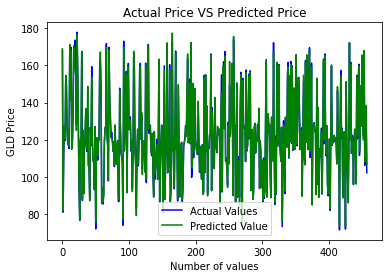

In [24]:
plt.plot(y_test, color = 'blue', label = 'Actual Values')
plt.plot(test_data_prediction, color ='green', label = 'Predicted Value')
plt.title("Actual Price VS Predicted Price")
plt.xlabel('Number of values')
plt.ylabel("GLD Price")
plt.legend()
plt.show()